# Import required moduels

In [43]:
import pandas as pd
import quandl as qndl
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300

# 1) Data Sources

## a) NSE - Bhav copy data

In [3]:
bhav = pd.read_csv('../../../data/cm26NOV2021bhav.csv', parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')

In [4]:
bhav_uniq = bhav[(~bhav.duplicated(['SYMBOL']) == True) & (bhav['SERIES'] != 'EQ')]
bhav_uniq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 343 entries, 2021-11-26 to 2021-11-26
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SYMBOL       343 non-null    object 
 1   SERIES       343 non-null    object 
 2   OPEN         343 non-null    float64
 3   HIGH         343 non-null    float64
 4   LOW          343 non-null    float64
 5   CLOSE        343 non-null    float64
 6   LAST         343 non-null    float64
 7   PREVCLOSE    343 non-null    float64
 8   TOTTRDQTY    343 non-null    int64  
 9   TOTTRDVAL    343 non-null    float64
 10  TOTALTRADES  343 non-null    int64  
 11  ISIN         343 non-null    object 
 12  Unnamed: 13  0 non-null      float64
dtypes: float64(8), int64(2), object(3)
memory usage: 37.5+ KB


## b) Quandl data

In [25]:
qndl_api_key="4foAh9PfJWQGLJxLVyCw"
qndl_sbi = qndl.get('NSE/SBIN', authtoken=qndl_api_key)
qndl_sbi.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-20,275.40,278.80,273.30,NaN,NaN,NaN,NaN
1998-03-23,278.45,280.90,278.45,279.95,279.95,591700.0,1654.91
1998-03-24,282.00,288.40,280.00,282.25,284.35,4979900.0,14231.55
1998-03-25,285.00,290.25,284.50,288.70,289.15,3632600.0,10436.93
1998-03-26,289.00,289.00,280.10,281.75,281.70,3861750.0,10996.67


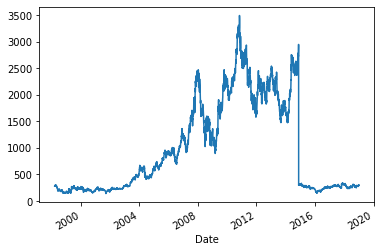

In [12]:
qndl_sbi['Close'].plot()
plt.show()

## 3) NSEPy Data

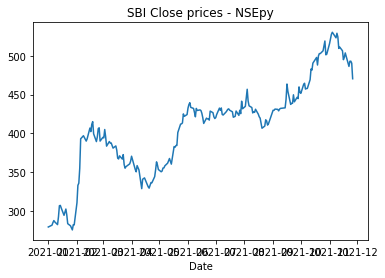

In [13]:
import nsepy as nse
from datetime import date, datetime

nsepy_sbi = nse.get_history(symbol='SBIN', start=date(2021,1,1), end=datetime.now().date())
nsepy_sbi['Close'].plot()
plt.title('SBI Close prices - NSEpy')
plt.show()

## 4) Pandas data reader

In [ ]:
yf.pdr_override()
pdr_sbi = pdr.get_data_yahoo('SBI.NS')

## 5) Fred API data

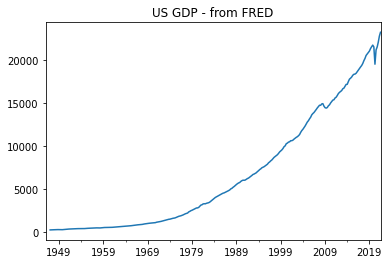

In [15]:
from fredapi import Fred
fred_api_key = '351cee427763fbb46a9cc3dda4e698de'
fred = Fred(api_key=fred_api_key)
fred_gdp = fred.get_series('GDP')
fred_gdp.plot()
plt.title('US GDP - from FRED')
plt.show()

## 6) Financial modeling prep

In [22]:
import FundamentalAnalysis as fa

fmp_api_key = '2b579d95dce84bb9e94d9bbd1a20f6ad'
fmp_sbi = fa.stock_data('SBIN.NS', period='ytd', interval='1d')
fmp_sbi.head()

,open,close,volume,high,low,adjclose
2021-01-01,274.899994,279.399994,24531791.0,280.000000,274.399994,276.844025
2021-01-04,281.850006,281.049988,31450608.0,283.899994,277.750000,278.478912
2021-01-05,278.049988,281.750000,27393072.0,282.450012,277.000000,279.172546
2021-01-06,283.000000,285.049988,40765708.0,289.149994,281.399994,282.442322
2021-01-07,289.000000,287.700012,30546600.0,291.799988,287.000000,285.068115


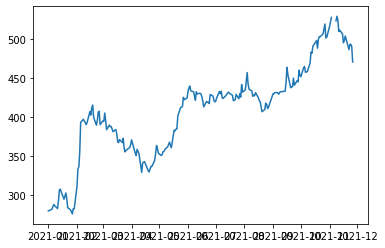

In [23]:
fmp_sbi['close'].plot()
plt.show()

## 7) Yahoo Finance data 

[*********************100%***********************]  1 of 1 completed


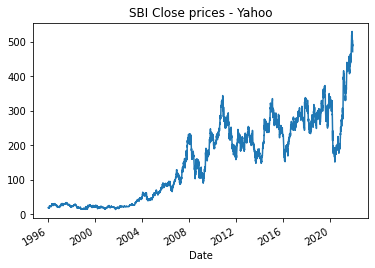

In [24]:
sbi_yf = yf.download('SBIN.NS')
sbi_yf['Close'].plot()
plt.title('SBI Close prices - Yahoo')
plt.show()

In [26]:
qndl_aapl = qndl.get('WIKI/MSFT', authtoken=qndl_api_key)
qndl_aapl.index = pd.Series(qndl_aapl.index).astype('datetime64[ns]')
qndl_aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0


<AxesSubplot:xlabel='Date'>

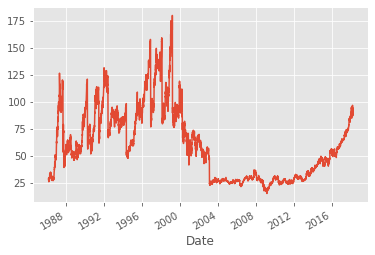

In [29]:
qndl_aapl['Close'].plot()

## Look at splits and dividends

<AxesSubplot:xlabel='Date'>

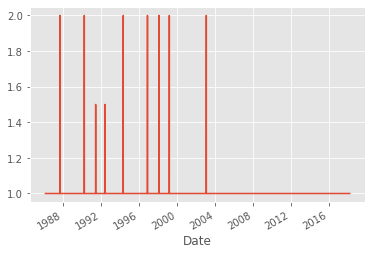

In [30]:
qndl_aapl['Split Ratio'].plot()

<AxesSubplot:xlabel='Date'>

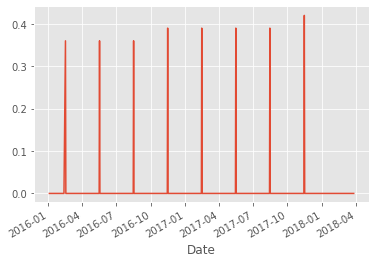

In [32]:
qndl_aapl.loc['2016':, 'Ex-Dividend'].plot()

## Adjust for cummulative dividends

In [42]:
cum_div = qndl_aapl['Ex-Dividend'].shift(-1)[::-1].cumsum()
cum_div.index = cum_div.index[::1]
pd.DataFrame([cum_div]*4).T

,Ex-Dividend,Ex-Dividend,Ex-Dividend,Ex-Dividend
Date,,,,
2018-03-27,NaN,NaN,NaN,NaN
2018-03-26,0.00,0.00,0.00,0.00
2018-03-23,0.00,0.00,0.00,0.00
2018-03-22,0.00,0.00,0.00,0.00
2018-03-21,0.00,0.00,0.00,0.00
...,...,...,...,...
1986-03-19,14.01,14.01,14.01,14.01
1986-03-18,14.01,14.01,14.01,14.01
1986-03-17,14.01,14.01,14.01,14.01


## Adjust for cummulative split on div adjusted data

In [44]:
split_locs = qndl_aapl.index[qndl_aapl['Split Ratio'] != 1]
split_locs

DatetimeIndex(['1987-09-21', '1990-04-16', '1991-06-27', '1992-06-15',
               '1994-05-23', '1996-12-09', '1998-02-23', '1999-03-29',
               '2003-02-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
split